# <a href="https://colab.research.google.com/drive/1IYs-d6yOXdgLOAGJsbSDmsQKxAkvvOat?usp=sharing">Click Here</a> to open this file on Google Colab

# <center>**TASK2 (PART-ll)**

# <center>**EXPLORATORY DATA ANALYSIS**</center>

### <center>**EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**

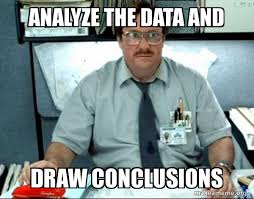 </center>

### **Steps involved in EDA**

###The steps mentioned below are helpful in performing EDA.You are suggested to do it if applicable in the dataset.

- Check the shape of the data frame.
- Check for null values.
- Convert the variables into appropriate data types if there is a mismatch.
- Check for the frequency of different classes in case of a categorical variable.
- Check for distribution of continuous variables

###Below is a checklist to guide you while performing EDA.

- What kind of data do you have?
- What’s missing from the data?
- Where are the outliers?
- How can you add, change or remove features to get more out of your data?
  - Feature Selection
  - Handling missing values
  - Handling skewed data
  - Handling outliers
  - Encoding
  - Feature Scaling

Finally we have the most important question, 
"What question are you trying to solve ?"  
You need to think about questions you can ask of a dataset.  
Questions can be simple as "What is the number of survivors?" or 
"Which gender had a better chance of survival?"  
You goal is to formulate your questions and making inferences.


### **Resources**
Watching:

- [EDA using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ)
- [Feature Selection-How To Drop Features Using Pearson Correlation](https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2)


Reading:

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Skewness in Machine Learning](https://beingdatum.com/handling-skewness-in-machine-learning/)
- [Transforming Skewed Data for Machine Learning](https://opendatascience.com/transforming-skewed-data-for-machine-learning/)
- [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [Box Plot Diagram to Identify Outliers](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)
- [Convert a categorical variable to a number for Machine Learning Model Building](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


In [1]:
# run this cell before proceeding further
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2021-07-06 13:42:07--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv.4’

titanic.csv.4       100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2021-07-06 13:42:07 (7.42 MB/s) - ‘titanic.csv.4’ saved [61194/61194]



*Make sure to run the above cell before loading the data*

Use the 'titanic.csv' dataset for the questions in this section.

#### **Using the concepts learnt till now perform EDA on the titanic datset**.

#### The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods.
**With Titanic dataset analysis draw minimum 5 conclusions from  and also answer the following questions .**

1)What is the overall passengers survival ratio?

2)Which groups have higher chances for survival?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")     
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing the shape of data, the type of data , the missing values , unique counts , and building a data dictionary dataframe.

In [3]:
titanic.shape

(891, 12)

In [4]:
# Creating the Data Dictionary with first column being datatype.
titanic_dict = pd.DataFrame(titanic.dtypes)
titanic_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
# identifying the missing values from the dataset.

titanic_dict['MissingVal'] = titanic.isnull().sum()
titanic_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [6]:
#checking which columns are containing null values and which are not 
# True means column contains null value , False means column does not contains any type of null value
print(titanic.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [7]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
titanic_dict['UniqueVal'] = titanic.nunique()
titanic_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [8]:
# identifying count of the variable.
titanic_dict['Count'] = titanic.count()
titanic_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [9]:
# renaming the first column using rename()
titanic_dict = titanic_dict.rename(columns = {0:'DataType'})
titanic_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


# Discriptive statistics on objects and other numerical datatypes.

In [10]:
# discriptive statistics on "objects" datatypes
titanic.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bryhl, Mr. Kurt Arnold Gottfrid",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# get discriptive statistics on "number" datatypes
titanic.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Applying Univariate and Multivariate Data Analysis using graphical representations

# Univariate Data Analysis

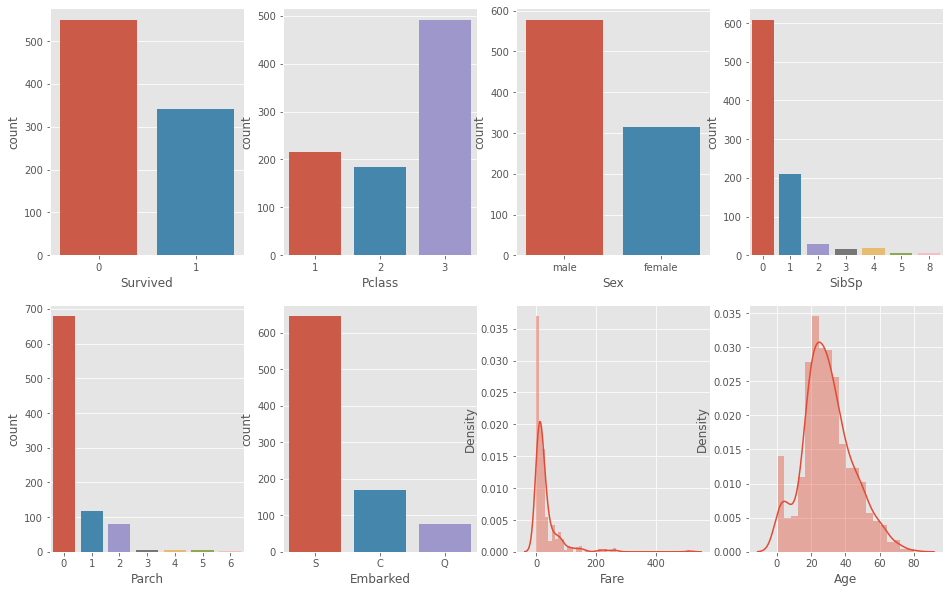

In [12]:
ig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = titanic, ax = axes[0,0])
sns.countplot('Pclass' , data = titanic, ax = axes[0,1])
sns.countplot('Sex' , data = titanic, ax = axes[0,2])
sns.countplot('SibSp' , data = titanic, ax = axes[0,3])
sns.countplot('Parch' , data = titanic, ax = axes[1,0])
sns.countplot('Embarked' , data = titanic, ax = axes[1,1])
sns.distplot(titanic['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(titanic['Age'].dropna() , kde = True , ax = axes[1,3])

# Bivariate Data Analysis

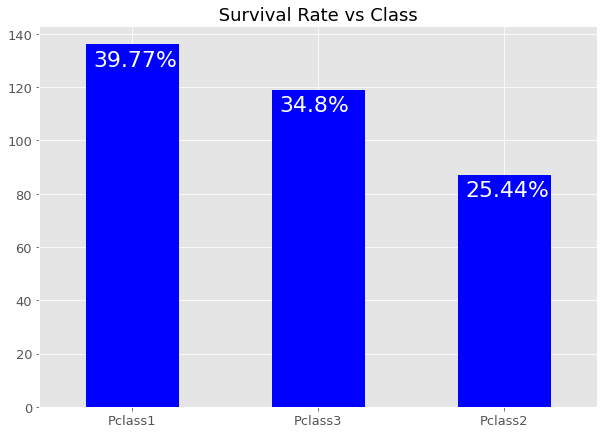

In [13]:
Pclass_survival = titanic[titanic.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# creating a list to collect the plt.patches data
totals = []

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# setting individual bar lables using above list
total = sum(totals)

# setting individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

# Joint Plot

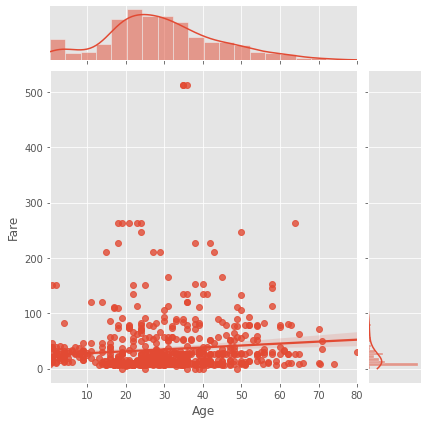

In [14]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = titanic, kind = 'reg');

# Multivariate Data Analysis

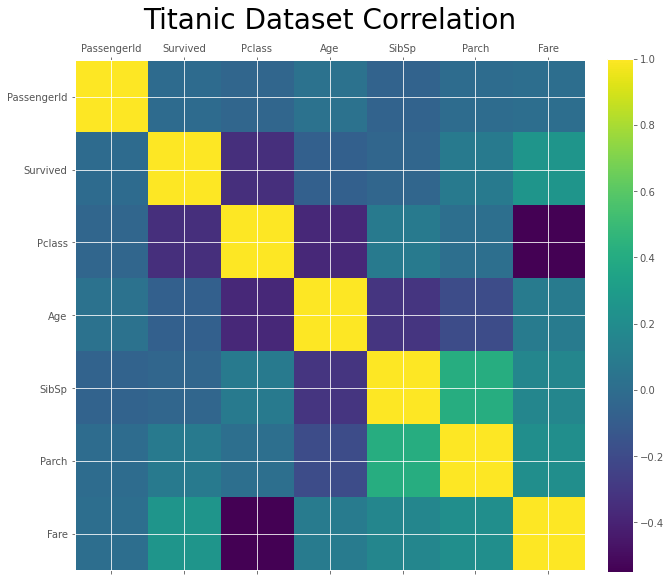

In [15]:
# For multivariate data analysis  used pandas "correlation matrix" .  can also use seaborn "heatmap".
def plotting_corr( titanic , size = 10):
    corr = titanic.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(titanic , size = 10)

There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

# 1)What is the overall passengers survival ratio?

In [16]:
survived_data = titanic[titanic['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print('\033[1mThe overall passengers survival ratio is {}'.format(survival_percent),"%") # \033[1m to make the line bold. 
                                                                                         # boldness not vivible while viewing on github

The overall passengers survival ratio is 38.38383838383838 %


# 2)Which groups have higher chances for survival?

# By Gender

In [17]:
genderSurvival = pd.crosstab(titanic['Survived'],titanic['Sex'])
genderSurvival
# 0 means not survived and 1 means survived

Sex,female,male
Survived,,
0,81,468
1,233,109


Proportion of survivors by Gender :

In [18]:
titanic.groupby('Sex').Survived.mean() #Grouping by sex and finding survived mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Conclusion : Female Passengers have higher chances for survival**

# By Pclass

In [19]:
classSurvival = pd.crosstab(titanic['Survived'],titanic['Pclass'])
classSurvival
# 0 means not survived and 1 means survived

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Proportion of survivors by Pclass:

In [20]:
titanic.groupby('Pclass').Survived.mean()  #Grouping by pclass and finding survived mean

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**Conclusion : Pclass 1 Passengers have higher chances for survival**

# By Age

In [21]:
# binning ages
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic['age_group'] = pd.cut(titanic.Age, range(0, 81, 10), right=False, labels=age_labels)

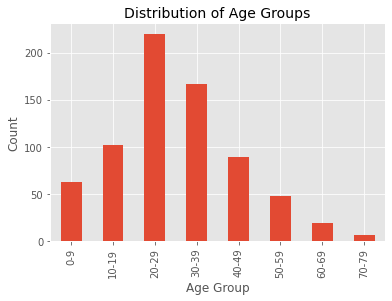

In [22]:
titanic.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

From the plot above we can see that the majority of passengers were aged between 20-29

Proportion of survivors by age group :

In [23]:
titanic.groupby(['age_group']).Survived.mean()  #Grouping by age group and finding survived mean

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

**Conclusion : Passengers aged between 0-9 have the higher chances for survival**

# Submitted By : <a href="https://www.linkedin.com/in/saurabh-satapathy-692a6a1b9">Saurabh Satapathy</a> 